<a href="https://colab.research.google.com/github/bleesy156/Machine-Learning/blob/main/Parkinson's_Disease_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/pd_speech_features.csv")

# **Columns Description:**

1. Baseline Features: Col_3 to Col_23
2. Intensity Parameters: Col_24 to Col_26
3. Formant Frequencies: Col_27 to Col_30
4. Bandwidth Parameters: Col_31 to Col_34
5. Vocal Fold: Col_35 to Col_56
6. MFCC: Col_57 to Col_140
7. Wavelet Features: Col_141 to Col_322
8. TQWT Features: Col_323 to Col_754
9. Class: Col_755

In [ ]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


PRE-PROCESSING THE DATA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [ ]:
df.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [ ]:
df.drop('id',axis =1,inplace = True)

In [ ]:
df.describe()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,1.673391e-05,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,2.290134e-05,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,6.860000e-07,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,5.260000e-06,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,9.530000e-06,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,1.832500e-05,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,2.564800e-04,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [ ]:
df.shape

(756, 754)

In [ ]:
df.corr()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
gender,1.000000,0.010175,0.099356,0.168321,-0.478367,-0.477710,0.460422,-0.110587,0.112004,0.147604,...,-0.098689,0.000210,0.066091,0.083499,0.089793,0.107618,0.128936,0.107734,0.104828,0.182713
PPE,0.010175,1.000000,-0.094775,-0.405558,0.191535,0.194098,-0.201907,-0.423660,-0.349053,-0.331009,...,0.144261,0.135544,0.091726,0.065035,0.044163,0.045755,0.046175,0.037385,0.039588,-0.072939
DFA,0.099356,-0.094775,1.000000,0.155075,-0.286791,-0.286611,0.253708,0.084655,0.212120,0.201248,...,-0.146325,-0.104456,-0.061129,-0.063451,-0.061845,-0.033914,0.043454,0.067843,0.116699,0.306070
RPDE,0.168321,-0.405558,0.155075,1.000000,-0.521193,-0.524839,0.506707,0.333545,0.614340,0.608966,...,-0.315592,-0.278504,-0.148989,-0.101467,-0.098923,-0.097161,-0.036406,-0.018052,0.021945,0.247444
numPulses,-0.478367,0.191535,-0.286791,-0.521193,1.000000,0.999917,-0.897079,-0.187478,-0.426350,-0.516920,...,0.268896,0.177255,0.043963,-0.024223,-0.036158,-0.047946,-0.068664,-0.069645,-0.062925,-0.284056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_33,0.107618,0.045755,-0.033914,-0.097161,-0.047946,-0.047837,0.039487,-0.092429,0.018504,0.029028,...,0.239203,0.486570,0.708646,0.841365,0.945107,1.000000,0.824620,0.698738,0.543845,0.119808
tqwt_kurtosisValue_dec_34,0.128936,0.046175,0.043454,-0.036406,-0.068664,-0.068561,0.046140,-0.061721,0.027886,0.026556,...,0.139668,0.383328,0.587449,0.667325,0.729501,0.824620,1.000000,0.948008,0.785141,0.192345
tqwt_kurtosisValue_dec_35,0.107734,0.037385,0.067843,-0.018052,-0.069645,-0.069468,0.040828,-0.067636,0.010553,0.007976,...,0.054510,0.275390,0.477147,0.550686,0.609663,0.698738,0.948008,1.000000,0.866696,0.219454
tqwt_kurtosisValue_dec_36,0.104828,0.039588,0.116699,0.021945,-0.062925,-0.062790,0.031685,-0.067147,0.003805,0.001741,...,-0.108280,0.070046,0.290106,0.386061,0.467944,0.543845,0.785141,0.866696,1.000000,0.279827


In [ ]:
df['gender'].value_counts()

1    390
0    366
Name: gender, dtype: int64

PERFORMING EDA


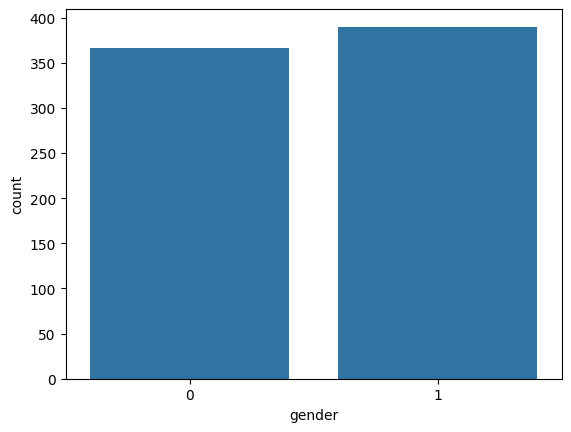

In [ ]:
sns.countplot(data=df, x='gender')
plt.show()

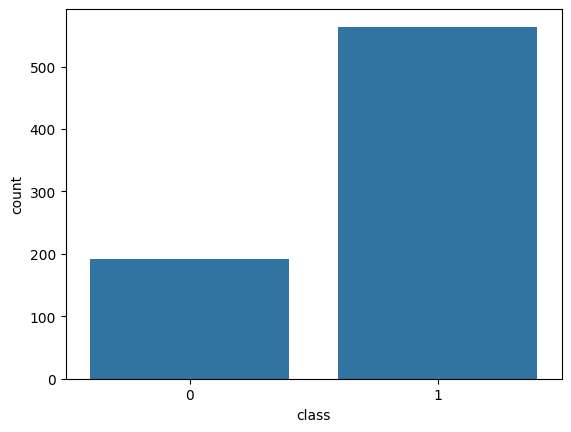

In [ ]:
sns.countplot(x='class', data=df)
plt.show()

<ipython-input-13-67142185207f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PPE'], hist_kws={'color': 'blue', 'alpha': 1}, \
<ipython-input-13-67142185207f>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DFA'], hist_kws={'color': 'blue', 'alpha': 1}, \
<ipython-input-13-671421852

Text(0, 0.5, 'Percentage')

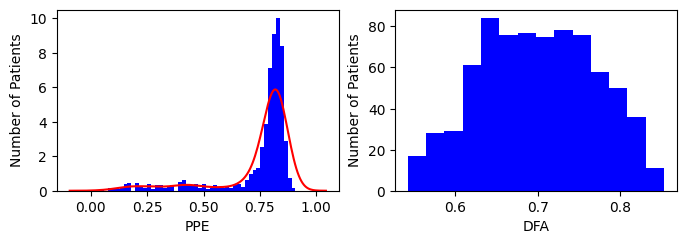

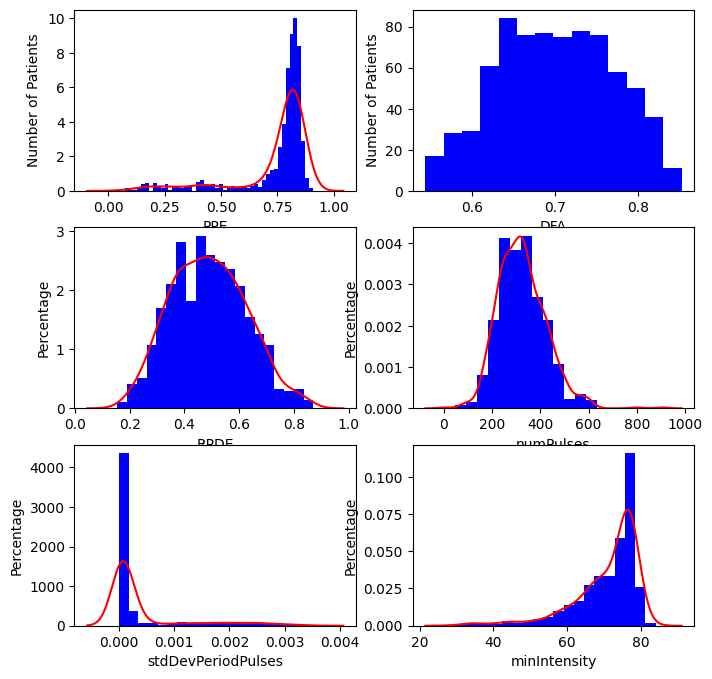

In [ ]:
fig = plt.figure(figsize=(8, 8))


ax1 = fig.add_subplot(321)
sns.distplot(df['PPE'], hist_kws={'color': 'blue', 'alpha': 1}, \
             kde_kws={'color': 'red'}, ax=ax1)
ax1.set_xlabel('PPE')
ax1.set_ylabel('Number of Patients')

ax2 = fig.add_subplot(322)
sns.distplot(df['DFA'], hist_kws={'color': 'blue', 'alpha': 1}, \
             kde_kws={'color': 'red'}, kde=False, ax=ax2)
ax2.set_xlabel('DFA')
ax2.set_ylabel('Number of Patients')

#visualising some of the numerical features
fig = plt.figure(figsize=(8, 8))


ax1 = fig.add_subplot(321)
sns.distplot(df['PPE'], hist_kws={'color': 'blue', 'alpha': 1}, \
             kde_kws={'color': 'red'}, ax=ax1)
ax1.set_xlabel('PPE')
ax1.set_ylabel('Number of Patients')

ax2 = fig.add_subplot(322)
sns.distplot(df['DFA'], hist_kws={'color': 'blue', 'alpha': 1}, \
             kde_kws={'color': 'red'}, kde=False, ax=ax2)
ax2.set_xlabel('DFA')
ax2.set_ylabel('Number of Patients')

ax3 = fig.add_subplot(323)
sns.distplot(df['RPDE'], hist_kws={'color': 'blue', 'alpha': 1}, \
             kde_kws={'color': 'red'}, bins=20, ax=ax3)
ax3.set_xlabel('RPDE')
ax3.set_ylabel('Percentage')

ax4 = fig.add_subplot(324)
sns.distplot(df['numPulses'], hist_kws={'color': 'blue', 'alpha': 1}, \
             kde_kws={'color': 'red'}, bins=20, ax=ax4)
ax4.set_xlabel('numPulses')
ax4.set_ylabel('Percentage')

ax5 = fig.add_subplot(325)
sns.distplot(df['stdDevPeriodPulses'], hist_kws={'color': 'blue', 'alpha': 1}, \
             kde_kws={'color': 'red'}, bins=20, ax=ax5)
ax5.set_xlabel('stdDevPeriodPulses')
ax5.set_ylabel('Percentage')

ax6 = fig.add_subplot(326)
sns.distplot(df['minIntensity'], hist_kws={'color': 'blue', 'alpha': 1}, \
             kde_kws={'color': 'red'}, bins=20, ax=ax6)
ax6.set_xlabel('minIntensity')
ax6.set_ylabel('Percentage')


**Feature Selection**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
cols_drop =['gender','class']
X = df.drop(columns =cols_drop, axis=1)  # Assuming the last column is the target variable
y = df['class']

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Feature selection using ANOVA F-statistic
k_best = SelectKBest(score_func=f_classif, k='all')
X_selected = k_best.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Print the indices of the selected features
print("Selected Feature Indices:", selected_feature_indices)

# Optionally, you can further investigate the feature scores
feature_scores = k_best.scores_
print("Feature Scores:", feature_scores)

# Replace 'feature_names' with your actual feature names or column names
selected_feature_names = [X.columns[i] for i in selected_feature_indices]

print("Selected feature names:", selected_feature_names)

Selected Feature Indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 

In [ ]:
total_features = X.shape[1]
selected_features_count = len(selected_feature_indices)
percentage_selected = (selected_features_count / total_features) * 100

# Print the percentage of features selected
print(f"Percentage of features selected: {percentage_selected:.2f}%")

Percentage of features selected: 100.00%


In [ ]:
y.value_counts()

1    564
0    192
Name: class, dtype: int64

**Auto-Splitting the Data**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate

In [ ]:
def evaluate_classifier_performance (X_train, X_test, y_train, y_test, classifier):
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')

  return accuracy, precision, recall, f1

In [ ]:
# Import or define evaluate_classifier_performance function here
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import numpy as np

def find_optimal_split_ratio(X_selected, y, classifiers, splitting_ratios):
    optimal_ratio = None
    max_accuracy = 0.0
    header = ['Test Ratio', 'Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
    table_data = []

    for test_ratio in splitting_ratios:
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=test_ratio, random_state=42)

        for classifier_name, classifier in classifiers.items():
            # Check if evaluation result is None
            evaluation_result = evaluate_classifier_performance(X_train, X_test, y_train, y_test, classifier)

            if evaluation_result is not None:
                accuracy, precision, recall, f1 = evaluation_result
                row_data = [f"{test_ratio:.2f}", classifier_name, f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}", f"{f1:.4f}"]
                table_data.append(row_data)

                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    optimal_ratio = test_ratio
            else:
                print(f"Evaluation result for {classifier_name} is None. Skipping...")

    # Move these lines outside the outer loop
    print("\nOptimal Setting Ratio:", optimal_ratio)
    print(tabulate(table_data, headers=header, tablefmt='grid'))

# Example classifiers dictionary
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC()

}

# Splitting Ratios
splitting_ratios = np.linspace(0.1, 0.9, 9)

# Find optimal split ratio
optimal_ratio = find_optimal_split_ratio(X_selected, y, classifiers, splitting_ratios)



Optimal Setting Ratio: 0.1
+--------------+------------------------+------------+-------------+----------+------------+
|   Test Ratio | Classifier             |   Accuracy |   Precision |   Recall |   F1-Score |
+==============+========================+============+=============+==========+============+
|          0.1 | Random Forest          |     0.8816 |      0.8754 |   0.8816 |     0.8721 |
+--------------+------------------------+------------+-------------+----------+------------+
|          0.1 | Gradient Boosting      |     0.9079 |      0.9174 |   0.9079 |     0.8964 |
+--------------+------------------------+------------+-------------+----------+------------+
|          0.1 | Support Vector Machine |     0.7632 |      0.7386 |   0.7632 |     0.7487 |
+--------------+------------------------+------------+-------------+----------+------------+
|          0.2 | Random Forest          |     0.8618 |      0.8577 |   0.8618 |     0.8533 |
+--------------+------------------------+-

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Model Building**

In [ ]:
#Importing Libraries for SMOTE for OverSampling
from imblearn.over_sampling import SMOTE
#Creating an instance for SMOTE
smote = SMOTE()
X_TRAIN, X_TEST, y_TRAIN, y_TEST = train_test_split(X_selected, y, test_size=0.1, random_state=42)
Xs_resampled, ys_resampled = smote.fit_resample(X_TRAIN,y_TRAIN)
outcome3 = ys_resampled.value_counts()
print(outcome3)

1    503
0    503
Name: class, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize the Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(Xs_resampled, ys_resampled)

# Make predictions on the test set
y_pred2 = decision_tree_model.predict(X_TEST)

# Evaluate the model
accuracy = accuracy_score(y_TEST, y_pred2)
conf_matrix = confusion_matrix(y_TEST, y_pred2)
classification_rep = classification_report(y_TEST, y_pred2)

# Display the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8026315789473685
Confusion Matrix:
[[12  3]
 [12 49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.80      0.62        15
           1       0.94      0.80      0.87        61

    accuracy                           0.80        76
   macro avg       0.72      0.80      0.74        76
weighted avg       0.86      0.80      0.82        76



In [ ]:
# Initialize the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
logistic_regression_model = LogisticRegression(random_state=42)

# Train the model
logistic_regression_model.fit(Xs_resampled, ys_resampled)

# Make predictions on the test set
y_pred3 = logistic_regression_model.predict(X_TEST)

# Evaluate the model
accuracy = accuracy_score(y_TEST, y_pred3)
conf_matrix = confusion_matrix(y_TEST, y_pred3)
classification_rep = classification_report(y_TEST, y_pred3)

# Display the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6710526315789473
Confusion Matrix:
[[11  4]
 [21 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.73      0.47        15
           1       0.91      0.66      0.76        61

    accuracy                           0.67        76
   macro avg       0.63      0.69      0.61        76
weighted avg       0.80      0.67      0.70        76



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(Xs_resampled, ys_resampled)

# Make predictions on the test set
y_pred4 = gb_model.predict(X_TEST)

# Evaluate the model
accuracy = accuracy_score(y_TEST, y_pred4)
conf_matrix = confusion_matrix(y_TEST, y_pred4)
classification_rep = classification_report(y_TEST, y_pred4)

# Display the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9210526315789473
Confusion Matrix:
[[12  3]
 [ 3 58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.95      0.95      0.95        61

    accuracy                           0.92        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.92      0.92      0.92        76



In [ ]:
#Building a Random Forest Model
# Create a Random Forest Classifier
from sklearn.metrics import accuracy_score, classification_report
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_TRAIN, y_TRAIN)

# Make predictions on the test set
y_pred5 = rf_classifier.predict(X_TEST)

# Evaluate the model
accuracy = accuracy_score(y_TEST, y_pred5)
classification_report_result = classification_report(y_TEST, y_pred5)
print('Accuracy :',accuracy)
print('Classification :',classification_report_result)

Accuracy : 0.8947368421052632
Classification :               precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.90      0.98      0.94        61

    accuracy                           0.89        76
   macro avg       0.89      0.76      0.80        76
weighted avg       0.89      0.89      0.88        76



**HyperParameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
param_grid = {
    'n_estimators':[15,25,45],
    'max_features':['sqrt','log2'],
    'max_depth':[4,6,8,10],
    'criterion':['gini','entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(Xs_resampled, ys_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [15, 25, 45]},
             scoring='accuracy')

In [ ]:
print('Best parameters found:',grid_search.best_params_)

Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 45}


In [ ]:
y_pred6 = grid_search.best_estimator_.predict(X_TEST)

In [ ]:
#Calculate performance metrics
accuracy = accuracy_score(y_TEST, y_pred6)
classification_report_result = classification_report(y_TEST, y_pred6)
print('Accuracy :',accuracy)
print('Classification :',classification_report_result)

Accuracy : 0.868421052631579
Classification :               precision    recall  f1-score   support

           0       0.65      0.73      0.69        15
           1       0.93      0.90      0.92        61

    accuracy                           0.87        76
   macro avg       0.79      0.82      0.80        76
weighted avg       0.88      0.87      0.87        76

